In [61]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
from sklearn.neural_network import MLPClassifier
# Pretty display for notebooks
%matplotlib inline

In [2]:
data = pd.read_csv("..\Datasets\car\car.data")

C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


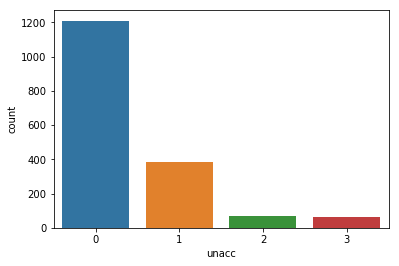

In [3]:
datanum = pd.DataFrame(columns = data.columns)
categorical = ['vhigh', 'vhigh.1', 'small', 'low', 'unacc']
datanum['vhigh'] = data['vhigh'].replace(['low', 'med', 'high', 'vhigh'],
                        [0, 1, 2, 3])
datanum['vhigh.1'] = data['vhigh.1'].replace(['low', 'med', 'high', 'vhigh'],
                        [0, 1, 2, 3])
datanum['small'] = data['small'].replace(['small', 'med', 'big'], [0, 1, 2])
datanum['low'] = data['low'].replace(['low', 'med', 'high'], [0, 1, 2])
datanum['unacc'] = data['unacc'].replace(['unacc', 'acc', 'good', 'vgood'], [0, 1, 2, 3])
datanum['2'] = data['2'].replace('5more',5)
datanum['2.1'] = data['2.1'].replace('more',5)
#datanum = datanum.astype('object').astype('int64')
datanum.head()
plt = sns.countplot(datanum['unacc'])

In [4]:
output = datanum[['unacc']]
features = datanum.drop(columns='unacc')


In [5]:
# Import train_test_split
# Split into training, validation and testing.
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, output, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1381 samples.
Testing set has 346 samples.


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1104 samples.
Validation set has 277 samples.
Testing set has 346 samples.


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
# Do scaling on training. Apply the same transformation to validation and testing.
X_train_np = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(data=X_train_np,columns=X_train.columns)
X_val_np = scaler.transform(X_val)
X_val_std = pd.DataFrame(data=X_val_np,columns=X_train.columns)
X_test_np = scaler.transform(X_test)
X_test_std = pd.DataFrame(data=X_test_np,columns=X_train.columns)


In [8]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,30)
tim = {}
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    start = time()
    km = km.fit(X_train_std)
    end = time()
    tim[k] = end -start
    Sum_of_squared_distances.append(km.inertia_)
print(Sum_of_squared_distances)

[838.5336424325559, 749.6467938494353, 690.0820217758321, 642.7194186068464, 605.7890978765864, 574.632010515139, 545.6344419825974, 525.2290574373619, 501.0805311119785, 482.4963539769543, 469.6418677281129, 451.20112683026224, 434.4705508042778, 422.0599441003202, 410.1720758300736, 398.34420484952244, 391.3509328202549, 380.6399470902503, 368.3809178276327, 359.9527229381815, 349.2926854445168, 344.9546650706625, 336.8593934886864, 332.2527278410989, 320.5463241126006, 315.9251922414066, 309.87824626067663, 303.5969906198289]


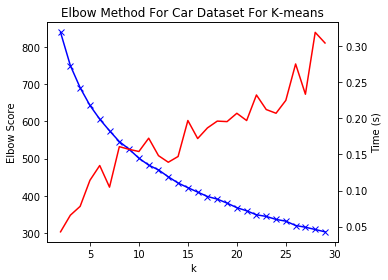

In [9]:
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (5.5,4))
ax1.plot(K, Sum_of_squared_distances, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Elbow Score')
ax1.set_title('Elbow Method For Car Dataset For K-means')
ax2 = ax1.twinx()
ax2.plot(K,tim.values(),'red')
ax2.set_ylabel('Time (s)')

#ax1 = visualizer.show() 


pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [10]:
#pip install yellowbrick

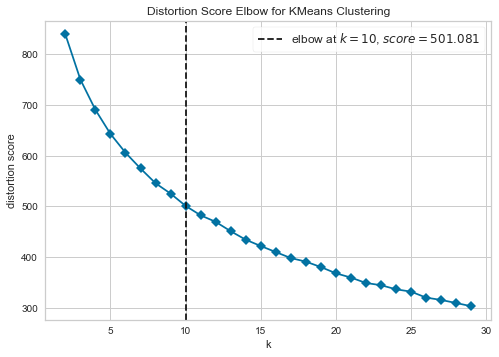

In [11]:
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,30), timings= False)
visualizer.fit(X_train_std) 
visualizer.show()



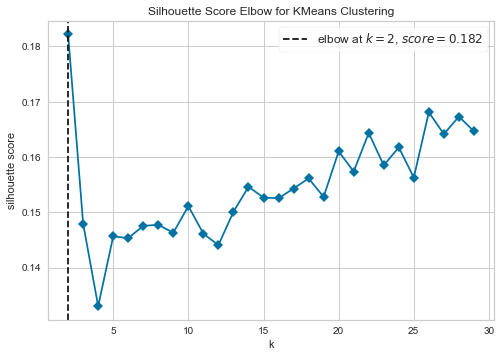

In [12]:
model = KMeans(random_state=1)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= False)
visualizer.fit(X_train_std)        # Fit the data to the visualizer

visualizer.show() 

In [13]:
from sklearn.metrics import fbeta_score
KM = KMeans(random_state = 1, n_clusters = 10)
KM = KM.fit(X_train_std)
predictions_train = KM.predict(X_train_std)
print(np.unique(predictions_train))
print(np.unique(y_train))
#fbeta_score(y_train,predictions_train,beta=1.,average='macro')

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3]


In [14]:
from sklearn.metrics import silhouette_score
score_list = []
K = range(2,30)
timGM = {}
for k in K:
    GM = GaussianMixture(n_components=k,random_state=1)
    start = time()
    GM = GM.fit(X_train_std)
    end = time()
    timGM[k] = end - start
    pred = GM.predict(X_train_std)
    score = silhouette_score(X_train_std, pred)
    score_list.append(score)
print(score_list)

[0.13587754247723832, 0.1097422987124132, 0.13077788897142262, 0.1434532598829818, 0.12759970523578168, 0.12327134228098492, 0.09461963325815331, 0.09587800460315524, 0.11803385083943596, 0.09570604267662555, 0.10624266705697137, 0.0696616471089459, 0.047132671194113004, 0.09285510470143658, 0.03910716932093626, 0.037462721971897976, 0.0057127201389784036, 0.05653118276419549, 0.012663256906047941, -0.02003965144120488, 0.018155353866035753, 0.01174997572688024, 0.008142791160664667, 0.006914065714273748, -0.015043222742254838, -0.07659416359754276, -0.03461224312265113, -0.01658188165799075]


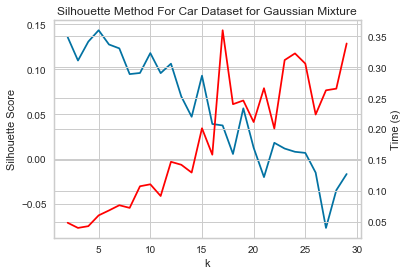

<Figure size 576x396 with 0 Axes>

In [15]:
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (5.5,4))
ax1.plot(K, score_list, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Method For Car Dataset for Gaussian Mixture')
ax2 = ax1.twinx()
ax2.plot(K,timGM.values(),'red')
ax2.set_ylabel('Time (s)')

#ax1 = visualizer.show() 


pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

# Dimensionality Reduction

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(X_train_std)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.17634474 0.16961097 0.15875095 0.14187184 0.13745751 0.13159785]
[0.19259307 0.18523886 0.1733782  0.15494385 0.15012279 0.14372322]
[13.94662121 13.6777522  13.23262256 12.50938186 12.31323014 12.04792196]


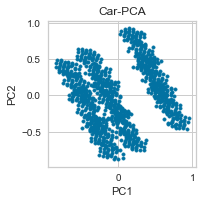

In [57]:
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X_train_std)

fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (3,3))
ax1.scatter(X_transformed[:,0],X_transformed[:,1],marker = '.')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Car-PCA')


pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

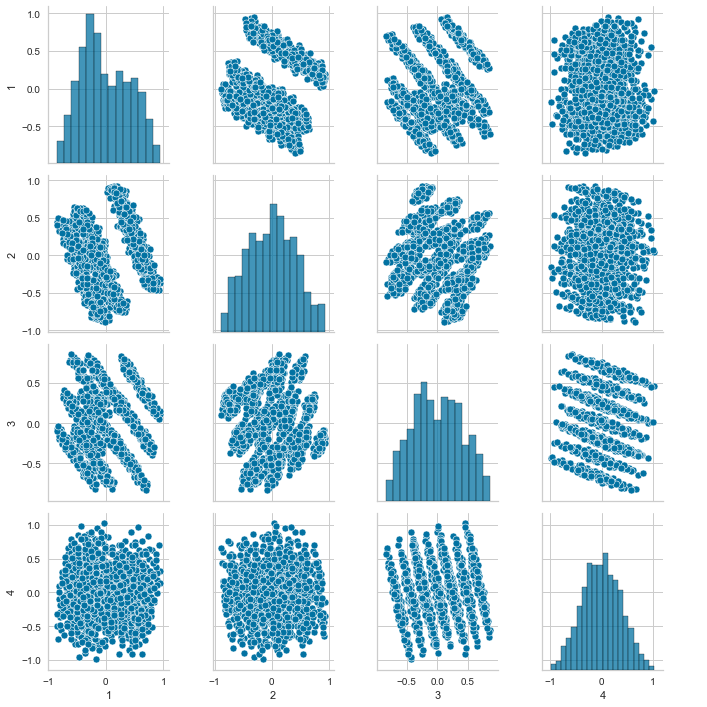

In [58]:
df = pd.DataFrame(X_transformed,columns = ['1','2','3','4'])
sns.pairplot(df)

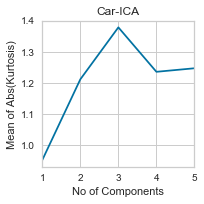

In [19]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
shape = X_train_std.shape[1]
values = []
K = range(1,shape)
for i in K:
    ica = FastICA(random_state=1, n_components=i)
    x_transformed = ica.fit_transform(X_train_std)
    kurt = (abs(kurtosis(x_transformed))).mean()
    values.append(kurt)
    
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (3,3))
ax1.plot(K ,values, 'bx-')
ax1.set_xlabel('No of Components')
ax1.set_ylabel('Mean of Abs(Kurtosis)')
ax1.set_xlim((1,5))
ax1.set_xticks(K)
ax1.set_title('Car-ICA')

pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

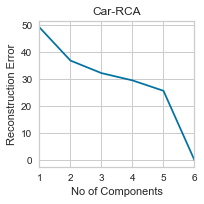

In [20]:
from sklearn.random_projection import GaussianRandomProjection
from scipy.linalg import pinv
size = X_train_std.shape[1]
A=X_train_std
val = []
K = range(1,size+1)
for i in K:
    RP = GaussianRandomProjection(random_state=1,n_components=i)
    X = RP.fit_transform(X_train_std)
    W = RP.components_

    #numpy pinv
    W_pinv=pinv(W).transpose()
    B = np.dot(X, W_pinv)

    #calc. dist. from original points
    dist = np.linalg.norm(A-B)
    val.append(dist)
    
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (3,3))
ax1.plot(K ,val, 'bx-')
ax1.set_xlabel('No of Components')
ax1.set_ylabel('Reconstruction Error')
ax1.set_xlim(1,5)
ax1.set_xticks(K)
ax1.set_title('Car-RCA')

pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

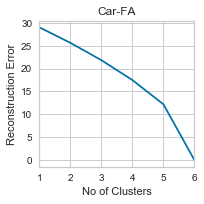

In [21]:
from sklearn.cluster import FeatureAgglomeration
from scipy.linalg import pinv
size = X_train_std.shape[1]
A=X_train_std
val = []
K = range(1,size+1)
for i in K:
    RP = FeatureAgglomeration(n_clusters=i)
    X = RP.fit_transform(X_train_std)
    Xinv = RP.inverse_transform(X)

    #calc. dist. from original points
    dist = np.linalg.norm(A-Xinv)
    val.append(dist)
    
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (3,3))
ax1.plot(K ,val, 'bx-')
ax1.set_xlabel('No of Clusters')
ax1.set_ylabel('Reconstruction Error')
ax1.set_xlim(1,5)
ax1.set_xticks(K)
ax1.set_title('Car-FA')

pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

## Dimensionality Reduction + Clustering

PCA+Kmeans

In [23]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        km = KMeans(n_clusters=k,random_state=1)
        km = km.fit(X_transformed)
        pred = km.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        candidate = km.inertia_
        if candidate < elbow:
            elbow = candidate
        if score > silhouette:
            silhouette = score
            print(i,k,silhouette)

1 2 0.1522420069032979
2 2 0.18218487074916462


PCA+GM

In [46]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        GM = GaussianMixture(n_components=k,random_state=1)
        GM = GM.fit(X_transformed)
        pred = GM.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

sil 1 2 0.15533220954018157


ICA+Kmeans

In [47]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -100000
for i in K1:
    ica = FastICA(random_state = 1, n_components=i)
    X_transformed = ica.fit_transform(X_train_std)
    K2 = range(2,20)
    for k in K2:
        km = KMeans(n_clusters=k,random_state=1)
        km = km.fit(X_transformed)
        pred = km.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        candidate = km.inertia_
        if candidate < elbow:
            elbow = candidate
            print('elb',i,k,elbow)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

elb 1 2 0.2588652733441867
sil 1 2 0.1522420069032979
elb 1 3 0.13345176629681071
elb 1 4 0.07636985282291593
elb 1 5 0.0507869390874176
elb 1 6 0.03605887587437738
elb 1 7 0.026862872587516393
elb 1 8 0.020509355200308645
elb 1 9 0.016454210655407617
elb 1 10 0.013268144680296348
elb 1 11 0.011123506080369907
elb 1 12 0.009359249428488198
elb 1 13 0.007822766305764894
elb 1 14 0.006851955790630016
elb 1 15 0.005817291963452468
elb 1 16 0.005220776905298019
elb 1 17 0.004628958201941156
elb 1 18 0.0041209834317655555
elb 1 19 0.0035952861254037317
sil 2 2 0.18218487074916462


ICA+GM

In [45]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    ica = FastICA(random_state = 1, n_components=i)
    X_transformed = ica.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        GM = GaussianMixture(n_components=k,random_state=1)
        pred = GM.fit_predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)
            

sil 1 2 0.1554662092823894


RP+Kmeans

In [25]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -100000
for i in K1:
    RP = GaussianRandomProjection(random_state=1,n_components=i)
    X_transformed = RP.fit_transform(X_train_std)
    K2 = range(2,20)
    for k in K2:
        km = KMeans(n_clusters=k,random_state=1)
        km = km.fit(X_transformed)
        pred = km.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        candidate = km.inertia_
        if candidate < elbow:
            elbow = candidate
            print('elb',i,k,elbow)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

elb 1 2 602.0088195725996
sil 1 2 0.11370465283632934
elb 1 3 299.32942103515484
elb 1 4 172.73057659175936
elb 1 5 114.71375164479254
elb 1 6 84.37918163529382
elb 1 7 64.71239967366114
elb 1 8 48.78109078141791
elb 1 9 38.82022855291224
elb 1 10 31.2186892331517
elb 1 11 25.99133184799573
elb 1 12 22.33260117585741
elb 1 13 19.34652097688388
elb 1 14 16.598856718101946
elb 1 15 14.450395628748437
elb 1 16 13.020893282411008
elb 1 17 11.43432890099331
elb 1 18 9.909619967580072
elb 1 19 8.928447396037534
sil 2 2 0.11435520350896435
sil 3 2 0.11573662335982954


RP+GM

In [48]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    RP = GaussianRandomProjection(random_state=1,n_components=i)
    X_transformed = RP.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        GM = GaussianMixture(n_components=k,random_state=1)
        pred = GM.fit_predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

sil 1 2 0.11386020010588972
sil 2 2 0.11428325812499542
sil 3 2 0.11573718680033353
sil 4 2 0.11830336615649432


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degen

sil 5 2 0.12322426785398423
sil 6 2 0.13587754247723832
sil 6 3 0.14409077367387357


FA+KMeans

In [26]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -100000
for i in K1:
    RP = FeatureAgglomeration(n_clusters=i)
    X_transformed = RP.fit_transform(X_train_std)
    K2 = range(2,20)
    for k in K2:
        km = KMeans(n_clusters=k,random_state=1)
        km = km.fit(X_transformed)
        pred = km.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        candidate = km.inertia_
        if candidate < elbow:
            elbow = candidate
            print('elb',i,k,elbow)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

elb 1 2 9.988808178501161
sil 1 2 0.11177627880506431
elb 1 3 5.011841652827541
elb 1 4 3.0652873716529956
elb 1 5 2.0121951163570237
elb 1 6 1.4784781144964023
elb 1 7 1.1456942458574484
elb 1 8 0.8371478804034841
elb 1 9 0.6933260921698376
elb 1 10 0.5657057686201877
elb 1 11 0.4676132542269793
elb 1 12 0.36077791480444393
elb 1 13 0.3504009591829357
elb 1 14 0.26935266700188104
elb 1 15 0.24972795861233713
elb 1 16 0.2197201217363189
elb 1 17 0.187317719081295
elb 1 18 0.16586473290161236
elb 1 19 0.14408209057184676
sil 2 2 0.18218487074916462


FA+GM

In [49]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    RP = FeatureAgglomeration(n_clusters=i)
    X_transformed = RP.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        GM = GaussianMixture(n_components=k,random_state=1)
        pred = GM.fit_predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

sil 1 2 0.11353064576523023
sil 2 2 0.18218487074916462


# Implement DR, transform X and use the new X to train the car dataset

In [122]:
def transform(case):
    X_train_t = case.fit_transform(X_train_std)
    X_val_t = case.transform(X_val_std)
    X_test_t = case.transform(X_test_std)
    return X_train_t, X_val_t, X_test_t

In [123]:
def optimize(X_train_t, X_val_t):
    # TODO: Initialize the classifier
    from sklearn.metrics import make_scorer
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import accuracy_score

    clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter = 10000, random_state=42, activation = 'tanh',
                          early_stopping = True, n_iter_no_change = 100)

    # TODO: Create the parameters list you wish to tune, using a dictionary if needed.
    # HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
    parameters = {'hidden_layer_sizes': [(3), (5), (10), (15), (20),
                                         (3, 3), (5, 5), (10, 10), (15, 15), (20, 20),
                                         (3, 3, 3), (5, 5, 5), (10, 10, 10), (15, 15, 15), (20, 20, 20)],
                  'max_iter': [1000, 10000, 20000]}
    # 'activation': ['identity', 'logistic', 'tanh', 'relu']
    # TODO: Make an fbeta_score scoring object using make_scorer()
    scorer = make_scorer(fbeta_score, beta=1., average='macro')

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=4,verbose=3)

    # TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X_train_t,y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train_t, y_train)).predict(X_val_t)
    best_predictions = best_clf.predict(X_val_t)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
    print("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 1., average ="macro")))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
    print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 1., average ="macro")))
    return best_clf

In [125]:
pca = PCA(n_components=4,random_state=1)
ica = FastICA(n_components=3,random_state=1)
rca = GaussianRandomProjection(n_components=2,random_state=1)
fa = FeatureAgglomeration(n_clusters=5)

DR = [pca, ica, rca, fa]
clf = {}
for i,case in enumerate(DR):
    print(case)
    X_train_t, X_val_t, X_test_t = transform(case)
    clf[i] = optimize(X_train_t, X_val_t)

PCA(n_components=4, random_state=1)
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.7762
F-score on validation data: 0.3849

Optimized Model
------
Final accuracy score on the validation data: 0.7690
Final F-score on the validation data: 0.3840
FastICA(n_components=3, random_state=1)
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.6643
F-score on validation data: 0.1996

Optimized Model
------
Final accuracy score on the validation data: 0.7437
Final F-score on the validation data: 0.3612
GaussianRandomProjection(n_components=2, random_state=1)
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.7473
F-score on validation data: 0.3508

Optimized Model
------
Final accuracy score on the validation data: 0.7292
Final F-score on the validation data: 0.3455
FeatureAgglomeration(n_clusters=5)
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.7978
F-score on validation data: 0.3969

Optimized Model
------
Final accuracy score on the validation data: 0.8412
Final F-score on the validation data: 0.6746


In [131]:
for i, case in enumerate(DR):
    X_train_t, X_val_t, X_test_t = transform(case)
    cl = clf[i]
    start = time()
    cl.fit(X_train_t,y_train)
    end = time()
    print("time",end-start)
    train_pred = cl.predict(X_train_t)
    val_pred = cl.predict(X_val_t)
    test_pred = cl.predict(X_test_t)
    print(case)
    print(cl.get_params())
    print("Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_pred, beta = 1., average ="macro")))
    print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, val_pred, beta = 1., average ="macro")))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, test_pred, beta = 1., average ="macro")))
    print("")


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.254664421081543
PCA(n_components=4, random_state=1)
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.3993
Final F-score on the validation data: 0.3840
Final F-score on the testing data: 0.3784



C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.1655454635620117
FastICA(n_components=3, random_state=1)
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.3498
Final F-score on the validation data: 0.3612
Final F-score on the testing data: 0.3513



C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 0.6585249900817871
GaussianRandomProjection(n_components=2, random_state=1)
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.3457
Final F-score on the validation data: 0.3455
Final F-score on the testing data: 0.3557



C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.44923996925354
FeatureAgglomeration(n_clusters=5)
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.6088
Final F-score on the validation data: 0.6746
Final F-score on the testing data: 0.5511



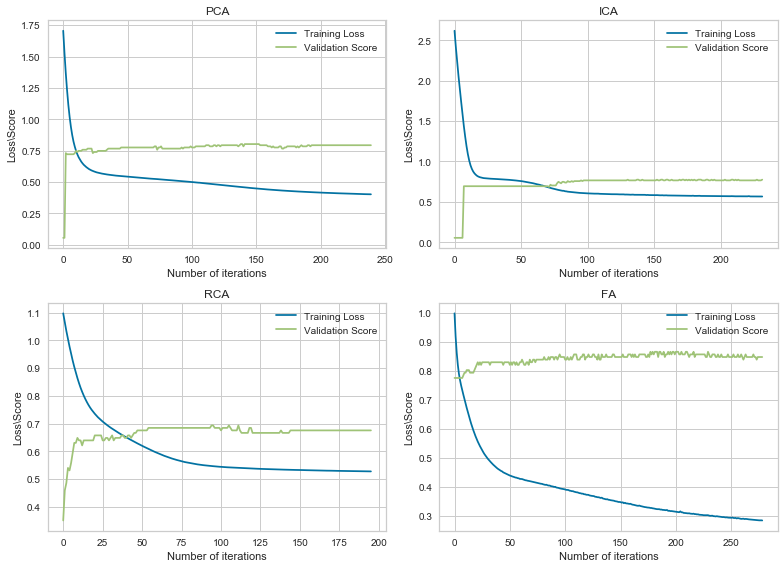

In [132]:
fig, ax = pl.subplots(2, 2, figsize = (11,8))
l = ["PCA","ICA","RCA","FA"]
for i,cl in enumerate(DR):
    cl = clf[i]
    ax[int(i/2),i%2].plot(cl.loss_curve_)
    ax[int(i/2),i%2].plot(cl.validation_scores_)
    ax[int(i/2),i%2].set_xlabel("Number of iterations")
    ax[int(i/2),i%2].set_ylabel("Loss\Score")
    ax[int(i/2),i%2].legend(["Training Loss","Validation Score"])
    ax[int(i/2),i%2].set_title(l[i])
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()


## DR+Cluster+ANN

In [150]:
def cluster(DL,CL):
    xtr, xva, xte = transform(DL)
    pred_tr = CL.fit_predict(xtr)
    pred_va = CL.predict(xva)
    pred_te = CL.predict(xte)
    return xtr, xva, xte, pred_tr, pred_va, pred_te
    
 

In [163]:
L = {"Feature": [2,2,3,2,1,1,6,2]}
L["Cluster"] = [2,2,2,2,2,2,3,2]
L["DL"] = [
    PCA(n_components = 2, random_state = 1),
    FastICA(n_components=2, random_state = 1),
    GaussianRandomProjection(n_components=3, random_state = 1),
    FeatureAgglomeration(n_clusters=2),
    PCA(n_components = 1, random_state = 1),
    FastICA(n_components=1, random_state = 1),
    GaussianRandomProjection(n_components=6, random_state = 1),
    FeatureAgglomeration(n_clusters=2)
]
L["CL"] = [
    KMeans(n_clusters=2,random_state=1),
    KMeans(n_clusters=2,random_state=1),
    KMeans(n_clusters=2,random_state=1),
    KMeans(n_clusters=2,random_state=1),
    GaussianMixture(n_components=2,random_state=1),
    GaussianMixture(n_components=2,random_state=1),
    GaussianMixture(n_components=3,random_state=1),
    GaussianMixture(n_components=2,random_state=1),
]

clf = {}
for i in range(8):
    DL = L["DL"][i]
    CL = L["CL"][i]
    xtr, xva, xte, pred_tr, pred_va, pred_te = cluster(DL,CL)
    X_train = np.c_[X_train_std,pred_tr]
    X_val = np.c_[X_val_std,pred_va]
    X_test = np.c_[X_test_std,pred_te]
    clf[i] = optimize(X_train, X_val)

    

Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.9386
F-score on validation data: 0.8871

Optimized Model
------
Final accuracy score on the validation data: 0.9639
Final F-score on the validation data: 0.9456
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.9386
F-score on validation data: 0.8871

Optimized Model
------
Final accuracy score on the validation data: 0.9639
Final F-score on the validation data: 0.9456
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.9422
F-score on validation data: 0.9239

Optimized Model
------
Final accuracy score on the validation data: 0.9278
Final F-score on the validation data: 0.8823
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.9386
F-score on validation data: 0.8767

Optimized Model
------
Final accuracy score on the validation data: 0.9639
Final F-score on the validation data: 0.9457
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.9567
F-score on validation data: 0.9405

Optimized Model
------
Final accuracy score on the validation data: 0.8845
Final F-score on the validation data: 0.7358
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.9567
F-score on validation data: 0.9405

Optimized Model
------
Final accuracy score on the validation data: 0.8845
Final F-score on the validation data: 0.7350
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.9278
F-score on validation data: 0.8402

Optimized Model
------
Final accuracy score on the validation data: 0.9314
Final F-score on the validation data: 0.8740
Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Unoptimized model
------
Accuracy score on validation data: 0.9386
F-score on validation data: 0.8767

Optimized Model
------
Final accuracy score on the validation data: 0.9639
Final F-score on the validation data: 0.9457


In [166]:
for i in range(8):
    DL = L["DL"][i]
    CL = L["CL"][i]
    print(DL,CL)
    xtr, xva, xte, pred_tr, pred_va, pred_te = cluster(DL,CL)
    X_train = np.c_[X_train_std,pred_tr]
    X_val = np.c_[X_val_std,pred_va]
    X_test = np.c_[X_test_std,pred_te]
    nn = clf[i]
    start = time()
    nn.fit(X_train,y_train)
    end = time()
    print("time",end-start)
    train_pred = nn.predict(X_train)
    val_pred = nn.predict(X_val)
    test_pred = nn.predict(X_test)
    print(cl.get_params())
    print("Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, train_pred, beta = 1., average ="macro")))
    print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, val_pred, beta = 1., average ="macro")))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, test_pred, beta = 1., average ="macro")))
    print("")

PCA(n_components=2, random_state=1) KMeans(n_clusters=2, random_state=1)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 2.235928773880005
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.9445
Final F-score on the validation data: 0.9456
Final F-score on the testing data: 0.8977

FastICA(n_components=2, random_state=1) KMeans(n_clusters=2, random_state=1)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 2.3849174976348877
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.9445
Final F-score on the validation data: 0.9456
Final F-score on the testing data: 0.8977

GaussianRandomProjection(n_components=3, random_state=1) KMeans(n_clusters=2, random_state=1)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.8139562606811523
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.8777
Final F-score on the validation data: 0.8980
Final F-score on the testing data: 0.8210

FeatureAgglomeration() KMeans(n_clusters=2, random_state=1)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.8127796649932861
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.9223
Final F-score on the validation data: 0.9457
Final F-score on the testing data: 0.9121

PCA(n_components=1, random_state=1) GaussianMixture(n_components=2, random_state=1)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.1423969268798828
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.8118
Final F-score on the validation data: 0.7358
Final F-score on the testing data: 0.7809

FastICA(n_components=1, random_state=1) GaussianMixture(n_components=2, random_state=1)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.0244290828704834
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.8118
Final F-score on the validation data: 0.7350
Final F-score on the testing data: 0.7809

GaussianRandomProjection(n_components=6, random_state=1) GaussianMixture(n_components=3, random_state=1)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.0603511333465576
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.8180
Final F-score on the validation data: 0.8740
Final F-score on the testing data: 0.8373

FeatureAgglomeration() GaussianMixture(n_components=2, random_state=1)


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


time 1.7652246952056885
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Final F-score on the training data: 0.9223
Final F-score on the validation data: 0.9457
Final F-score on the testing data: 0.9121



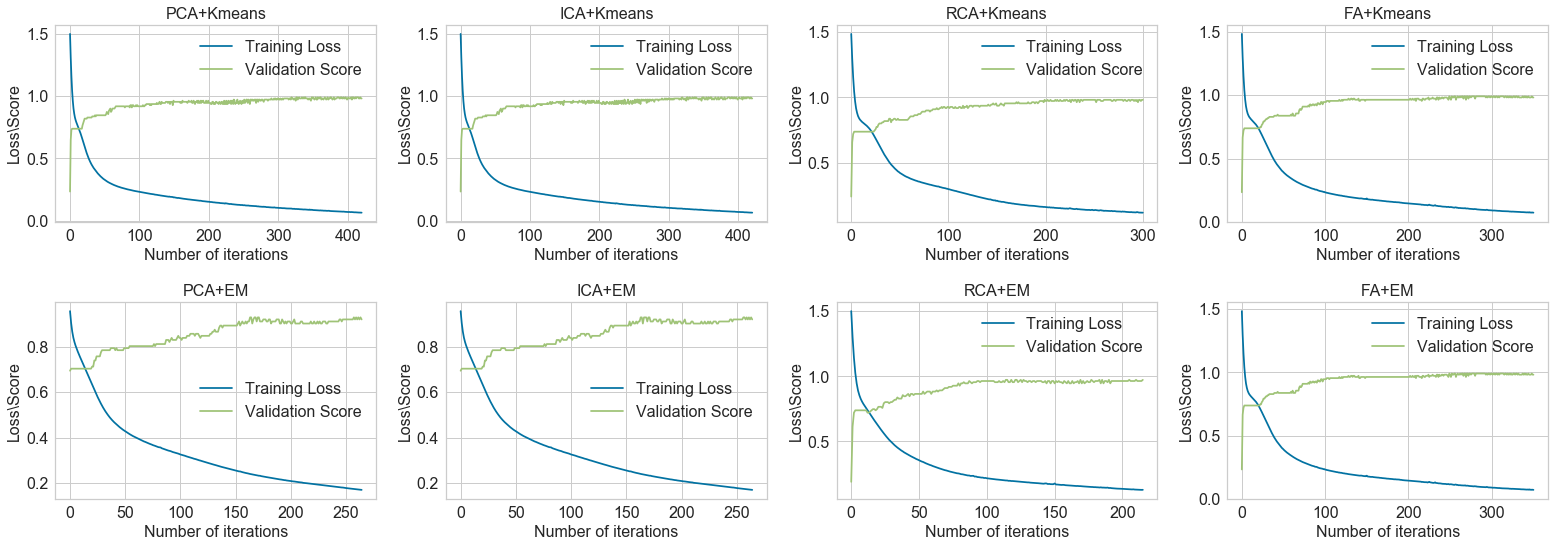

In [190]:
fig, ax = pl.subplots(2, 4, figsize = (22,8))
l = ["PCA+Kmeans","ICA+Kmeans","RCA+Kmeans","FA+Kmeans",
     "PCA+EM","ICA+EM","RCA+EM","FA+EM"]
for i in range(8):
    cl = clf[i]
    ax[i//4,i%4].plot(cl.loss_curve_)
    ax[i//4,i%4].plot(cl.validation_scores_)
    ax[i//4,i%4].tick_params(axis='both', which='major', labelsize=16)
    ax[i//4,i%4].set_xlabel("Number of iterations",fontsize=16)
    ax[i//4,i%4].set_ylabel("Loss\Score",fontsize=16)
    ax[i//4,i%4].legend(["Training Loss","Validation Score"],fontsize=16)
    ax[i//4,i%4].set_title(l[i],fontsize=16)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()